<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/Activity_5_Data_interpretations_using_Histograms_%26_Boxplots_what_would_be_the_box_plot_of_median_of_%22PESO%22_in_SEXO_2%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px   #Graficas interactivas
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('/content/drive/MyDrive/antropometria-dataset-1.csv',
                   #sheet_name='Canada by Citizenship',
                   #skiprows=range(20),
                   #skipfooter=2,
                   #engine='openpyxl'
                  )
df.head(2)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101


In [109]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [110]:
df_pivot = df.pivot_table('peso', 
               index='desc_ent', 
               columns='sexo'
               )
df_pivot

sexo,1,2
desc_ent,,
AGUASCALIENTES,69.985381,63.254292
BAJA CALIFORNIA,71.391818,65.893667
BAJA CALIFORNIA SUR,75.561015,68.168959
CAMPECHE,68.622637,62.920493
CHIAPAS,58.365222,57.096111
CHIHUAHUA,68.892642,64.815295
COAHUILA DE ZARAGOZA,68.873094,67.467348
COLIMA,70.998878,66.978393
DISTRITO FEDERAL,69.460661,61.654128


In [111]:
favs = ['folio', 'intp', 'entidad', 'edad', 'meses',
       'ropa', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var', 'talla']

df.drop(favs, 
        axis=1, #axis One is Column
        inplace=True
       )

df.head(6)

,desc_ent,sexo,peso
0,PUEBLA,2,73.70
1,DURANGO,2,35.65
2,AGUASCALIENTES,2,54.80
3,DISTRITO FEDERAL,1,33.40
4,PUEBLA,2,97.95
5,SAN LUIS POTOSI,1,31.90


In [112]:
df2 = df.drop(df[df['sexo']==1].index)
df2

,desc_ent,sexo,peso
0,PUEBLA,2,73.70
1,DURANGO,2,35.65
2,AGUASCALIENTES,2,54.80
4,PUEBLA,2,97.95
6,PUEBLA,2,31.95
...,...,...,...
18633,MICHOACAN DE OCAMPO,2,75.40
18635,VERACRUZ DE IGNACIO DE LA LLAVE,2,75.80
18636,CAMPECHE,2,69.40
18638,SINALOA,2,59.05


In [113]:
df3 = df2.drop(['sexo'], 
                axis = 1)
df3

,desc_ent,peso
0,PUEBLA,73.70
1,DURANGO,35.65
2,AGUASCALIENTES,54.80
4,PUEBLA,97.95
6,PUEBLA,31.95
...,...,...
18633,MICHOACAN DE OCAMPO,75.40
18635,VERACRUZ DE IGNACIO DE LA LLAVE,75.80
18636,CAMPECHE,69.40
18638,SINALOA,59.05


In [114]:
df3_pivot = df3.pivot_table('peso', 
               index='desc_ent',
               aggfunc='median' 
               )
df3_pivot

,peso
desc_ent,
AGUASCALIENTES,63.7000
BAJA CALIFORNIA,64.2000
BAJA CALIFORNIA SUR,68.5500
CAMPECHE,62.3750
CHIAPAS,56.0250
CHIHUAHUA,64.6250
COAHUILA DE ZARAGOZA,67.3000
COLIMA,66.0000
DISTRITO FEDERAL,61.4500


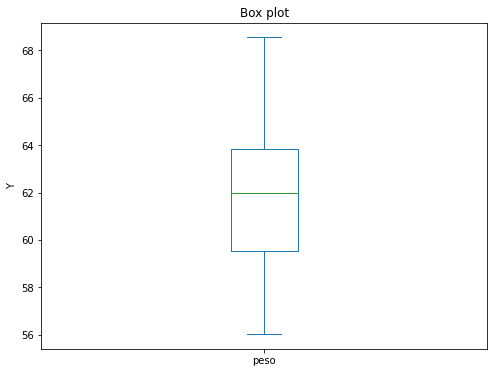

In [115]:
df3_pivot.plot(kind='box', 
              figsize=(8, 6)
             )

plt.title('Box plot')
plt.ylabel('Y')

plt.show()